# Data setup

In [130]:
#load necessary packages

library(psyntur)
library(tidyverse)
library(ggplot2)
library(moments)
library(emmeans)
library(lsr)
library(dplyr)
library(afex)
#change working directory 
setwd(r"(C:\Users\invate\OneDrive\Documents\Nottingham Trent Work\Project lab\Analysis)")

#read in data 
demographic_data = read.csv(r"(C:\Users\invate\OneDrive\Documents\Nottingham Trent Work\Project lab\Analysis\Clean data\Demographic data\cleaned_demographic_data.csv)")
offline_full = read.csv(r"(C:\Users\invate\OneDrive\Documents\Nottingham Trent Work\Project lab\Analysis\Clean data\Offline task data\cleaned_2AFC_data_full.csv)")
offline_illusionary = read.csv(r"(C:\Users\invate\OneDrive\Documents\Nottingham Trent Work\Project lab\Analysis\Clean data\Offline task data\cleaned_2AFC_data_illusionary.csv)")
offline_part = read.csv(r"(C:\Users\invate\OneDrive\Documents\Nottingham Trent Work\Project lab\Analysis\Clean data\Offline task data\cleaned_2AFC_data_part_sequence.csv)")
online_OML = read.csv(r"(C:\Users\invate\OneDrive\Documents\Nottingham Trent Work\Project lab\Analysis\Clean data\Online task data\cleaned_online_data_OML.csv)")
online_position = read.csv(r"(C:\Users\invate\OneDrive\Documents\Nottingham Trent Work\Project lab\Analysis\Clean data\Online task data\cleaned_online_data_position.csv)")
online_OML_forlm = read.csv(r"(C:\Users\invate\OneDrive\Documents\Nottingham Trent Work\Project lab\Analysis\Clean data\Online task data\cleaned_online_data_OML.csv)")

#recode categorical variables as a factor for all data sets 
offline_illusionary$condition = as.factor(offline_illusionary$condition)
offline_illusionary$comparison_type= as.factor(offline_illusionary$comparison_type)

offline_part$condition = as.factor(offline_part$condition)
offline_part$comparison_type = as.factor(offline_part$comparison_type)

offline_full$condition = as.factor(offline_full$condition)
offline_full$comparison_type =as.factor(offline_full$comparison_type)
offline_full$id = as.factor(offline_full$id)

online_OML$condition = as.factor(online_OML$condition)
online_OML$block = as.factor(online_OML$block)
online_OML$id = as.factor(online_OML$id)
online_OML_forlm$condition = as.factor(online_OML_forlm$condition)
online_position$condition = as.factor(online_position$condition)
online_position$position = as.factor(online_position$position)
online_position$id = as.factor(online_position$id)


#create position data subsets (necessary for ANOVA)
online_position_spatial_cue = online_position %>% filter(grepl("spatial_cue", condition))
online_position_cueless = online_position %>% filter(grepl("cueless", condition))

#create OML data subsets (necessary for comparing linear models)
online_OML_spatial_cue = online_OML_forlm %>% filter(grepl("spatial_cue", condition))
online_OML_cueless = online_OML_forlm %>% filter(grepl("cueless", condition))





In [131]:
detect_outlier <- function(x) {
 
    # calculate first quantile
    Quantile1 <- quantile(x, probs=.25, na.rm= TRUE)
 
    # calculate third quantile
    Quantile3 <- quantile(x, probs=.75, na.rm = TRUE)
 
    # calculate inter quartile range
    IQR = Quantile3-Quantile1
 
    # return true or false
    x > Quantile3 + (IQR*1.5) | x < Quantile1 - (IQR*1.5)
}
 
# create remove outlier function
remove_outlier <- function(dataframe,
                            columns=names(dataframe)) {
 
    # for loop to traverse in columns vector
    for (col in columns) {
 
        # remove observation if it satisfies outlier function
        dataframe <- dataframe[!detect_outlier(dataframe[[col]]), ]
    }
 
    # return dataframe
    return(dataframe)
}
 
online_position <- remove_outlier(online_position, c("log_rt"))

online_OML <- remove_outlier(online_OML, c("OML"))

# Demographic data

In [132]:
#get age descriptive statistics
descriptive_statistics = describe(demographic_data,
mean_age = mean(age),
min_age = min(age), 
max_age = max(age),
sd_age = sd(age))

#get gender descriptive statistics 
table(demographic_data$gender)
print(descriptive_statistics)

#count number per condition 
online_OML %>% group_by(condition) %>% summarise(count = n_distinct(id)) #note each condition should have an additional 4 vs what seen here because its using the OML data for conditions, which had certain partiicpants dropped







     female      Female      FEMALE genderfluid        male        Male 
         25          29           2           1           1           2 

  mean_age min_age max_age   sd_age
1 20.46667      18      38 3.548534


condition,count
<fct>,<int>
cueless,23
spatial_cue,29


# Online data 

## Descriptive statistics & visualisaiton

In [133]:
#Get descriptive statistics for position data
online_descriptives = online_position %>%
group_by(condition, position) %>%
summarise(mean_rt = mean(rt), 
sd_rt = sd(rt), 
mean_log_rt = mean(log_rt), 
sd_log_rt = sd(log_rt))
as.data.frame(online_descriptives) #ensures it retains the decimal values


`summarise()` has grouped output by 'condition'. You can override using the `.groups` argument.


condition,position,mean_rt,sd_rt,mean_log_rt,sd_log_rt
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
cueless,shape_1,491.7334,88.80914,6.162241,0.1660219
cueless,shape_2,506.5325,96.06230,6.191786,0.1762703
cueless,shape_3,496.8226,87.81884,6.173102,0.1685648
spatial_cue,shape_1,580.2931,93.83984,6.333551,0.1639549
spatial_cue,shape_2,567.6826,98.49214,6.308865,0.1763914
spatial_cue,shape_3,555.3805,94.01341,6.288465,0.1682114


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Saving 6.67 x 6.67 in image
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


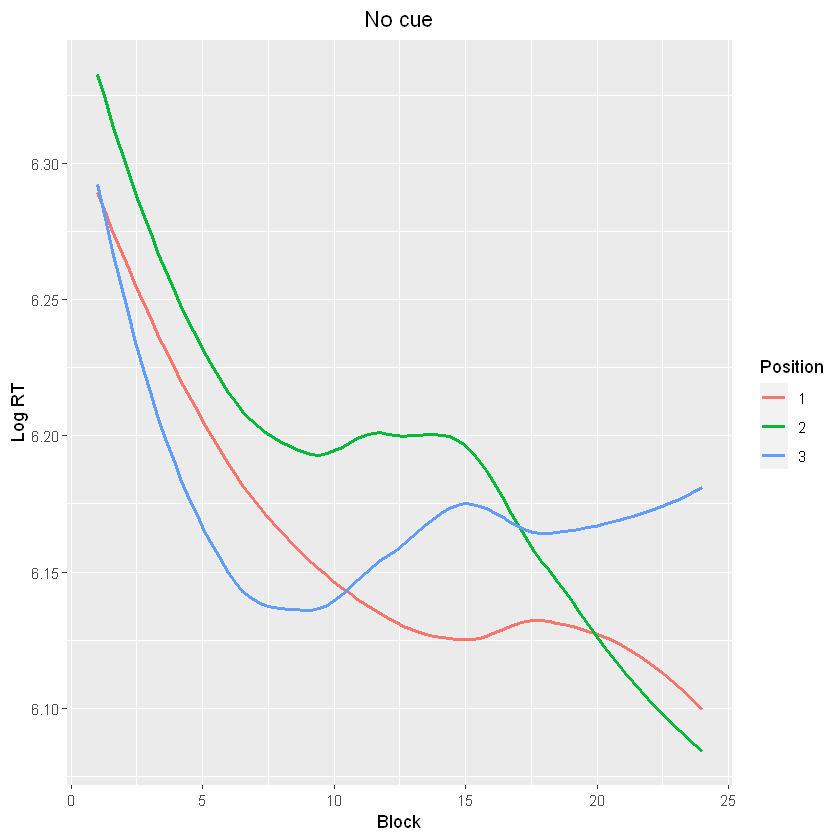

Saving 6.67 x 6.67 in image
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`summarise()` has grouped output by 'block'. You can override using the `.groups` argument.
Warning message in geom_line(se = FALSE):
"Ignoring unknown parameters: `se`"


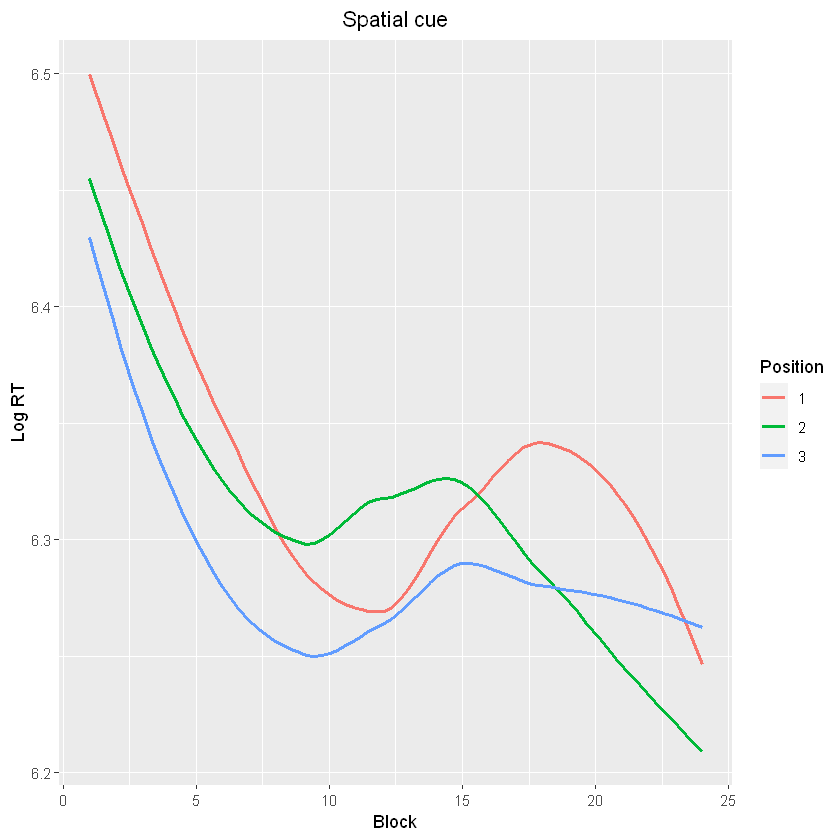

Saving 6.67 x 6.67 in image
`summarise()` has grouped output by 'block'. You can override using the `.groups` argument.
Warning message in geom_line(se = FALSE):
"Ignoring unknown parameters: `se`"


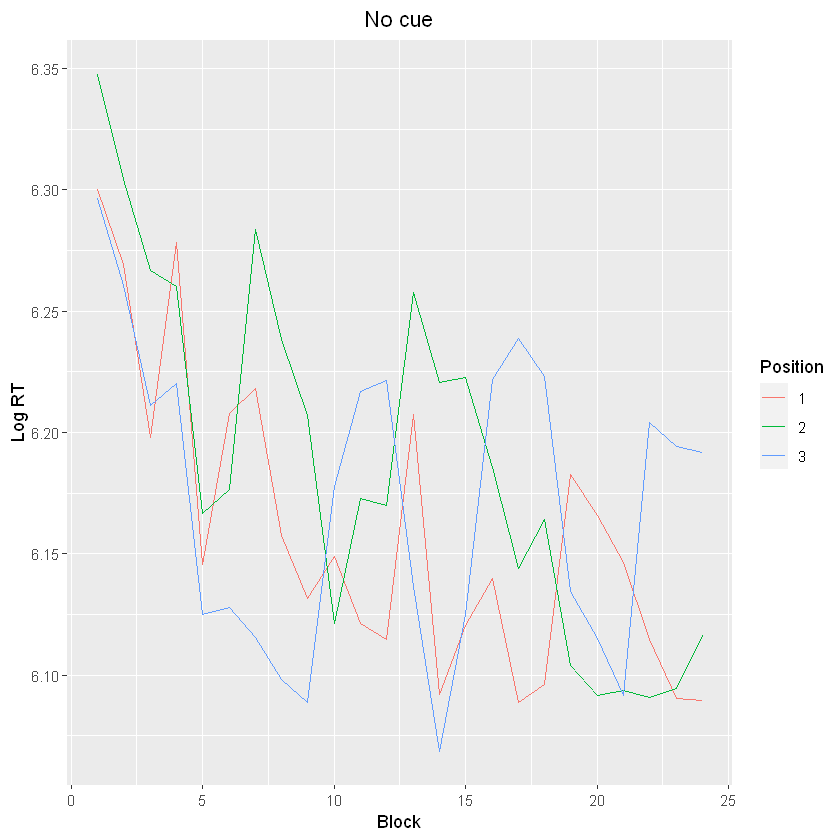

Saving 6.67 x 6.67 in image
`summarise()` has grouped output by 'condition'. You can override using the `.groups` argument.
Saving 6.67 x 6.67 in image
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


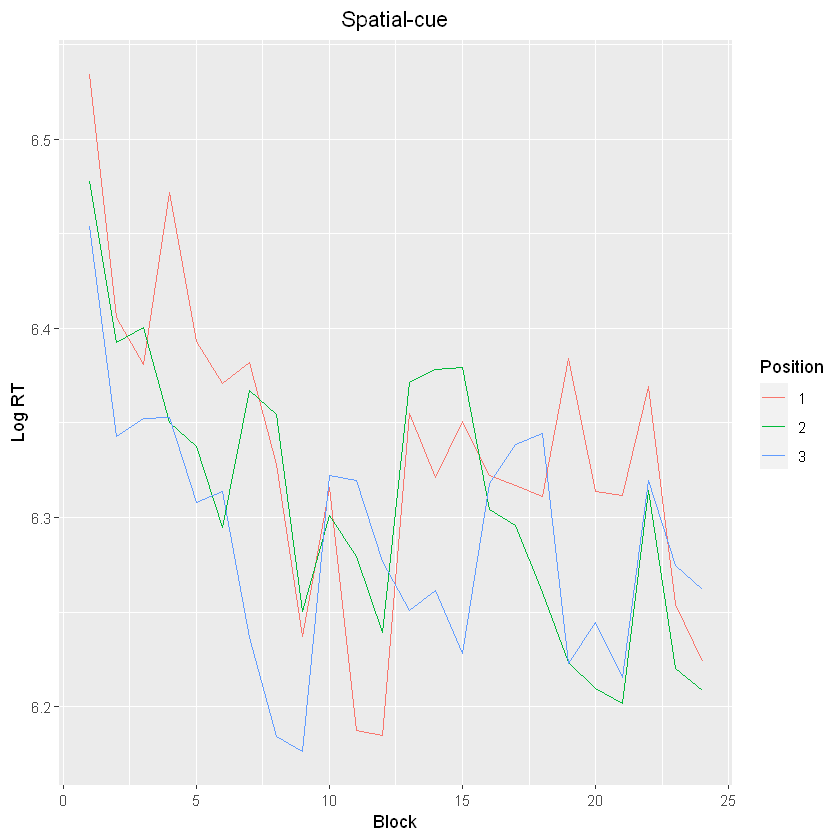

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


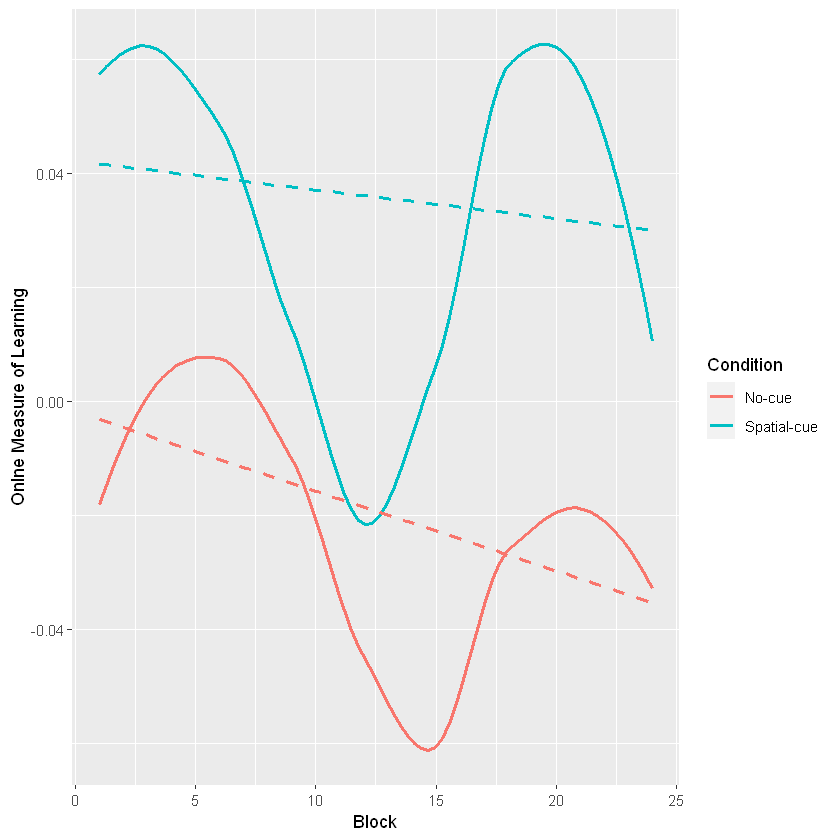

condition,block,OML
<fct>,<dbl>,<dbl>
cueless,1,-0.0219045488
cueless,2,0.0012698071
cueless,3,-0.0408922302
cueless,4,0.0379374524
cueless,5,-0.0002836420
cueless,6,0.0558312614
cueless,7,0.0183881214
cueless,8,-0.0105275588
cueless,9,-0.0165743436


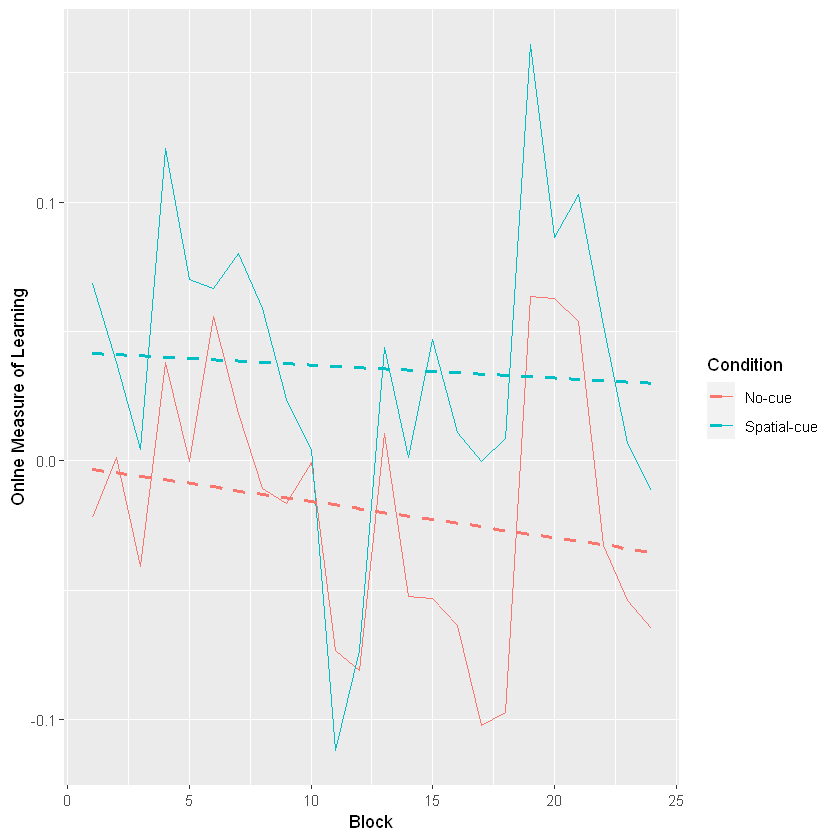

In [134]:
#Set titles to be centered automatically 
theme_update(plot.title = element_text(hjust = 0.5))

#make a smoothed conditional graphs graph of the log rts for the unpredictable shapes by condition 
# ggplot(online_position, aes(x = block, y = log_rt, colour = position, by = condition)) + geom_smooth(se = FALSE) #smooth makes the graph easier to view
ggplot(online_position_cueless, aes(x = block, y = log_rt, colour = position)) + 
    geom_smooth(se = FALSE) + #smooth makes the graph easier to view
    labs(x = "Block", y = "Log RT") + 
    scale_colour_discrete(name = "Position", labels = c("1", "2", "3")) +
    ggtitle("No cue") 
ggsave(r"(C:\Users\invate\OneDrive\Documents\Nottingham Trent Work\Project lab\Analysis\Graphs\Cueless_position_smoothed.png)")

ggplot(online_position_spatial_cue, aes(x = block, y = log_rt, colour = position)) + 
    geom_smooth(se = FALSE) + 
    labs(x = "Block", y = "Log RT") + 
    scale_colour_discrete(name = "Position", labels = c("1", "2","3")) +
    ggtitle("Spatial cue") 

ggsave(r"(C:\Users\invate\OneDrive\Documents\Nottingham Trent Work\Project lab\Analysis\Graphs\Spatial_cue_position_smoothed.png)")



#make line graphs
online_position_cueless_line <- online_position_cueless %>% group_by(block, position) %>% summarise(mean = mean(log_rt)) 
ggplot(online_position_cueless_line, aes(x = block, y = mean, colour = position)) +
    geom_line(se = FALSE) + 
    labs(x = "Block", y = "Log RT") + 
    scale_colour_discrete(name = "Position", labels = c("1", "2","3")) +
    ggtitle("No cue") 
ggsave(r"(C:\Users\invate\OneDrive\Documents\Nottingham Trent Work\Project lab\Analysis\Graphs\)Cueless_position.png)")

online_position_spatial_cue_line <- online_position_spatial_cue %>% group_by(block, position) %>% summarise(mean = mean(log_rt)) 
ggplot(online_position_spatial_cue_line, aes(x = block, y = mean, colour = position)) + 
    geom_line(se = FALSE) + 
    labs(x = "Block", y = "Log RT") + 
    scale_colour_discrete(name = "Position", labels = c("1", "2","3")) +
    ggtitle("Spatial-cue") 
ggsave(r"(C:\Users\invate\OneDrive\Documents\Nottingham Trent Work\Project lab\Analysis\Graphs\Spatial_cue_position.png)")

# #make a line graph of the OML scores 
# OML_graph = ggplot(online_OML, aes(x = block, y = OML, colour = condition)
# ) + geom_smooth(se = FALSE) + labs(x = "Block", y = "Onlne Measure of Learning") + scale_colour_discrete(name = "Condition", labels = c("No cue", "Spatial cue"))

# ggsave(r"(C:\Users\invate\OneDrive\Documents\Nottingham Trent Work\Project lab\Analysis\Graphs\OML_graph.png)")
# print(OML_graph)

#make smoothed graph of OML scores by condition 
online_OML_forgraph <- online_OML_forlm %>% group_by(condition, block) %>% summarise(OML = mean(OML))
OML_graph_lm_smoothed = ggplot(online_OML_forlm, aes(x = block, y = OML, colour = condition)) + 
    geom_smooth(se = FALSE) + labs(x = "Block", y = "Onlne Measure of Learning") + 
    scale_colour_discrete(name = "Condition", labels = c("No-cue", "Spatial-cue"))  + 
    geom_smooth(se = FALSE, method = "lm", linetype = "dashed")
    

ggsave(r"(C:\Users\invate\OneDrive\Documents\Nottingham Trent Work\Project lab\Analysis\Graphs\OML_graph_lm_smoothed.png)")
print(OML_graph_lm_smoothed)


#linegraph version

OML_graph_lm_line = ggplot(online_OML_forgraph, aes(x = block, y = OML, colour = condition)
) + geom_line() + labs(x = "Block", y = "Onlne Measure of Learning") + scale_colour_discrete(name = "Condition", labels = c("No-cue", "Spatial-cue")
) + geom_smooth(se = FALSE, method = "lm", linetype = "dashed") #+ geom_point()
ggsave(r"(C:\Users\invate\OneDrive\Documents\Nottingham Trent Work\Project lab\Analysis\Graphs\OML_graph_lm_line.png)", units = c("cm"), height = 15, width = 15)
print(OML_graph_lm_line)


View(online_OML_forgraph)




In [135]:
# #test for for error bars

# #TODO: need to go back to git backup to get code prior to mistakenly deleting this bit 

# plot <- ggplot(online_OML_forlm, aes(x = block, y = OML,  colour = condition)) + geom_line() +geom_errorbar(data = bars, aes(ymin = mean-sd, ymax = mean+sd)) + geom_point()
# print(plot)
# str(online_OML_forgraph)
# OML_graph_lm_line = ggplot(online_OML_forgraph, aes(x = block, y = OML, colour = condition)
# ) + geom_line() + labs(x = "Block", y = "Onlne Measure of Learning") + scale_colour_discrete(name = "Condition", labels = c("No cue", "Spatial cue") 
# ) + geom_smooth(se = FALSE, method = "lm", linetype = "dashed") +geom_errorbar(data = online_OML_forgraph, aes(ymin = OML-sd, ymax = OML+sd))
# print(OML_graph_lm_line)


## Analyses 
### Position data
#### ANOVAs

In [136]:
# #[ANOVA_model] <- aov([outcome_variable] ~ [condition] + Error(id/[condition]), data = [data])

# print("Cueless Position ANOVA---------------------------------------------------------------------------------------------------------------------------")

# ez_anova(data = online_position_cueless, dv = log_rt, wid = id, within = position, type = 3, detailed = TRUE, return_aov = TRUE)

# #summary(position_cueless_model)
# print("Spatial_cue Position ANOVA---------------------------------------------------------------------------------------------------------------------------")
# ez_anova(data = online_position_spatial_cue, dv = log_rt, wid = id, within = position, type = 3, detailed = TRUE, return_aov = TRUE)

print("Combined Position ANOVA---------------------------------------------------------------------------------------------------------------------------")
ez_anova(data = online_position, dv = log_rt, wid = id, within = position, between = condition, type = 3, detailed = TRUE, return_aov = TRUE)




[1] "Combined Position ANOVA---------------------------------------------------------------------------------------------------------------------------"


Warning message:
"Data is unbalanced (unequal N per group). Make sure you specified a well-considered value for the type argument to ezANOVA()."
Warning message:
"Collapsing data to cell means. *IF* the requested effects are a subset of the full design, you must use the "within_full" argument, else results may be inaccurate."


$ANOVA
              Effect DFn DFd          SSn        SSd            F            p
1        (Intercept)   1  50 5.999572e+03 1.88669820 1.589966e+05 3.065419e-89
2          condition   1  50 7.029606e-01 1.88669820 1.862939e+01 7.495315e-05
3           position   2 100 1.196080e-02 0.06309753 9.478026e+00 1.700877e-04
4 condition:position   2 100 2.872147e-02 0.06309753 2.275958e+01 7.144796e-09
  p<.05         ges
1     * 0.999675116
2     * 0.264992526
3     * 0.006096985
4     * 0.014516665

$`Mauchly's Test for Sphericity`
              Effect         W         p p<.05
3           position 0.9846085 0.6838448      
4 condition:position 0.9846085 0.6838448      

$`Sphericity Corrections`
              Effect       GGe        p[GG] p[GG]<.05      HFe        p[HF]
3           position 0.9848418 1.860664e-04         * 1.024914 1.700877e-04
4 condition:position 0.9848418 9.020740e-09         * 1.024914 7.144796e-09
  p[HF]<.05
3         *
4         *

$aov

Call:
aov(formula = formu

In [137]:

#bonferoni corrections
int_model_plot = aov(log_rt ~ position*condition+Error(id/position), data = online_position)


fixed <- emmeans(int_model_plot, specs = pairwise ~ position | condition , adjust = "bonf",) #must assign to variable to get it to work with Juepyter 
print(fixed)




Note: re-fitting model with sum-to-zero contrasts

NOTE: Results are based on intra-block estimates and are biased.



$emmeans
condition = cueless:
 position emmean     SE   df lower.CL upper.CL
 shape_1    6.18 0.0210 50.0     6.14     6.22
 shape_2    6.21 0.0210 50.0     6.17     6.25
 shape_3    6.19 0.0210 50.0     6.15     6.24

condition = spatial_cue:
 position emmean     SE   df lower.CL upper.CL
 shape_1    6.33 0.0209 49.2     6.29     6.37
 shape_2    6.30 0.0209 49.1     6.26     6.35
 shape_3    6.28 0.0209 49.1     6.24     6.33

Confidence level used: 0.95 

$contrasts
condition = cueless:
 contrast          estimate      SE  df t.ratio p.value
 shape_1 - shape_2  -0.0306 0.00742 100  -4.121  0.0002
 shape_1 - shape_3  -0.0120 0.00741 100  -1.621  0.3247
 shape_2 - shape_3   0.0185 0.00741 100   2.504  0.0417

condition = spatial_cue:
 contrast          estimate      SE  df t.ratio p.value
 shape_1 - shape_2   0.0262 0.00657 100   3.979  0.0004
 shape_1 - shape_3   0.0469 0.00657 100   7.141  <.0001
 shape_2 - shape_3   0.0208 0.00656 100   3.169  0.0061

P value adjustment: bonferroni

Note: re-fitting model with sum-to-zero contrasts

NOTE: Results are based on intra-block estimates and are biased.

Note: re-fitting model with sum-to-zero contrasts

NOTE: Results are based on intra-block estimates and are biased.



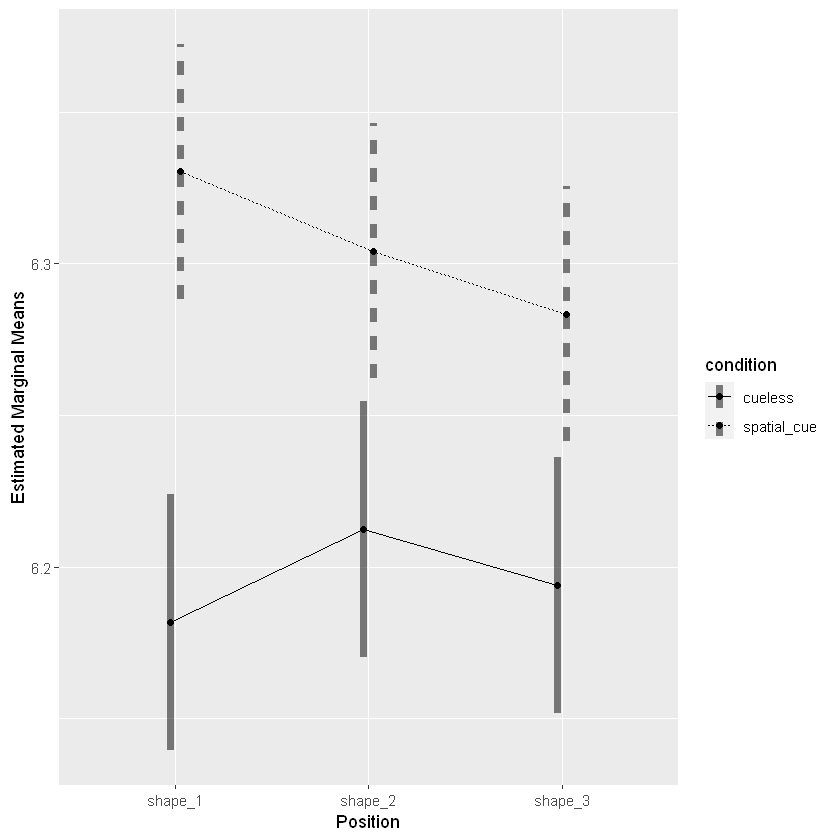

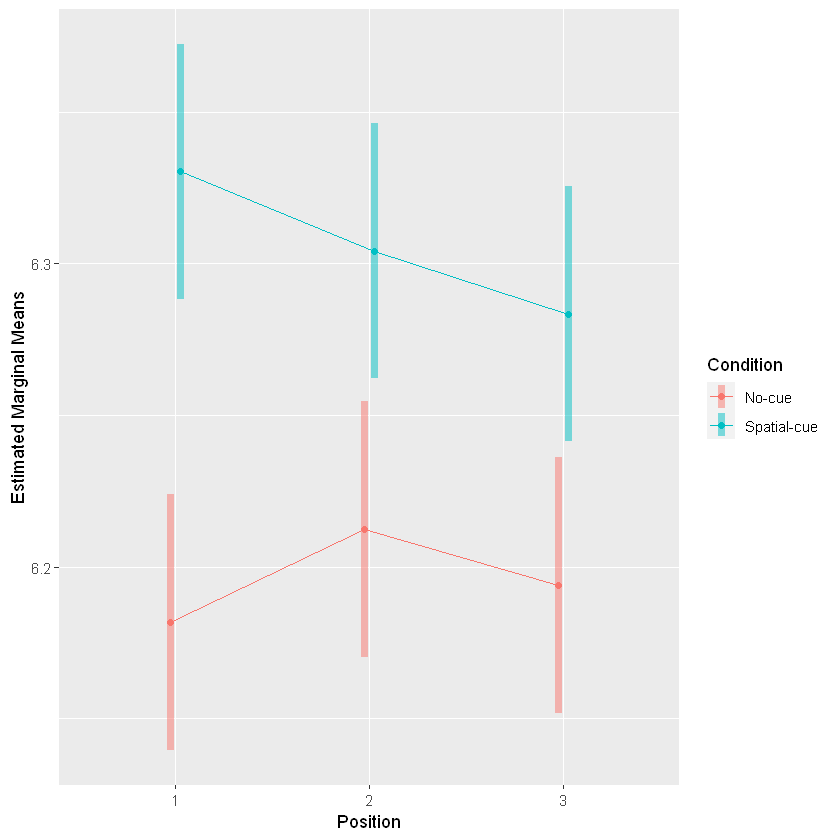

In [138]:
#plot interaction (grey scale)
int_plot <- emmip(int_model_plot, condition ~ position, CIs= TRUE, ylab = "Estimated Marginal Means")
int_plot + aes(linetype = condition) + scale_color_grey(start = 0, end = 0) + labs(x = "Position") 


#plot interaction (with colour)
int_plot <- emmip(int_model_plot, condition ~ position, CIs= TRUE, ylab = "Estimated Marginal Means")
int_plot + labs(x = "Position", color = "Condition", linetype = "Condition") +
scale_color_discrete(name = "Condition", labels = c("No-cue", "Spatial-cue")) +
scale_x_discrete(name = "Position", labels = c("1", "2","3"))

ggsave(r"(C:\Users\invate\OneDrive\Documents\Nottingham Trent Work\Project lab\Analysis\Graphs\Positio_ANOVA_colour.png)", units = c("cm"), height = 15, width = 15)


##### Wilcox tests

Commented out to prevent rstatix breaking the shapiro_wilks tests

In [139]:
# library(rstatix)

# test_data <- subset(online_position_cueless, subset=online_position_cueless$id != 7678918)
# test_data <- droplevels(test_data)

# test <- test_data %>% wilcox_test(log_rt ~ position, paired = TRUE, p.adjust.method = "bonferroni")
# print(test)


#### Assumptions



In [140]:
library(MASS)
res_model.aov = aov(log_rt ~ position*condition + Error(id/position), data = online_position, qr = T)

# res_model <- aov(OML ~ condition*block, data = online_OML, qr = T)
# res_data <- mutate(online_OML, residuals(res_model))




#alternative way to access residuals
library(afex)
res_model <- aov_ez(data = online_position, id = "id", dv = "log_rt", within = "position", between = "condition")
 
res_data = predict(res_model, online_position, append = TRUE, colname_predict = "residuals")

Warning message:
"More than one observation per design cell, aggregating data using `fun_aggregate = mean`.
To turn off this warning, pass `fun_aggregate = mean` explicitly."
Contrasts set to contr.sum for the following variables: condition



##### Normality


condition,statistic,p_value
<fct>,<dbl>,<dbl>
cueless,0.9885362,4.687062e-10
spatial_cue,0.9984174,4.549779e-02


[1] "Skew and kurtosis:"


condition,skew,kurt
<fct>,<dbl>,<dbl>
cueless,0.2531485,1.500425
spatial_cue,0.1381395,1.504123


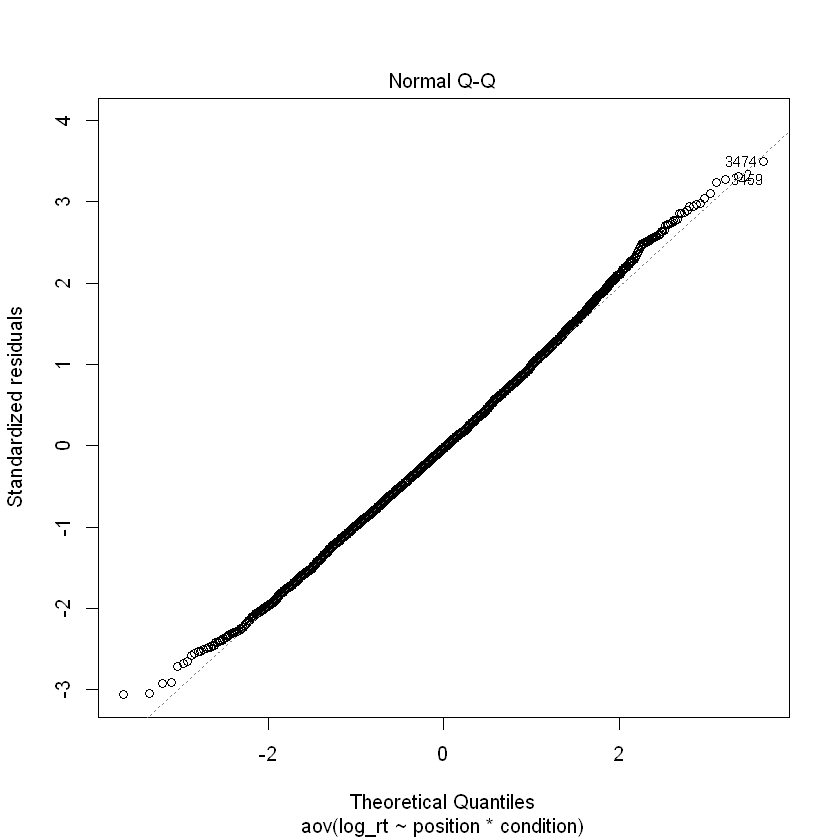

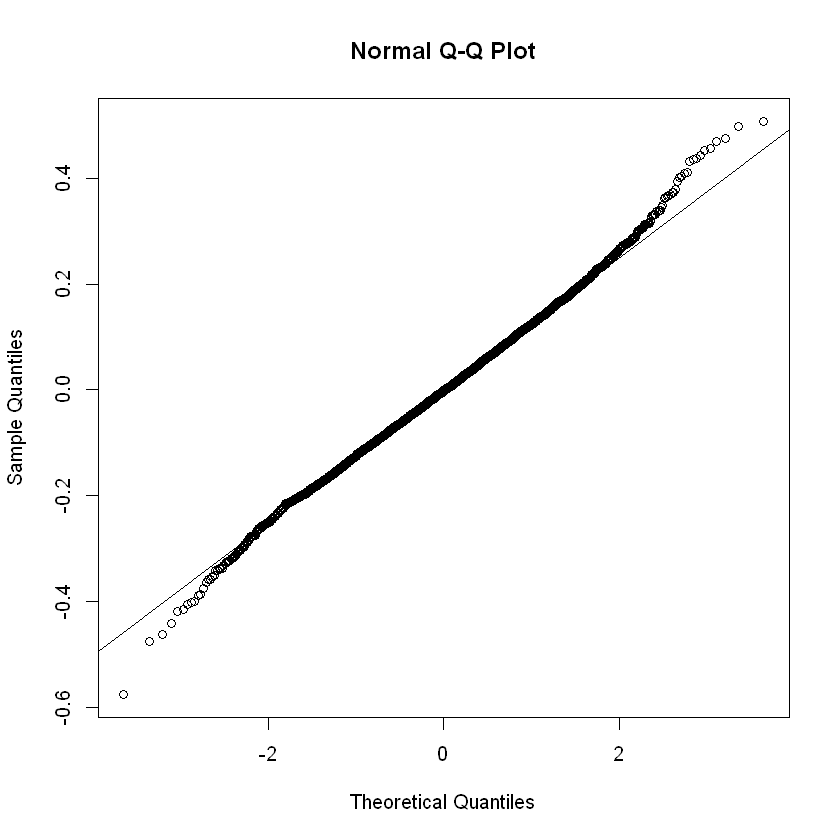

In [141]:

#shapiro wilks test 
shapiro_test(y = log_rt, by = condition, data = online_position)

#access skew & kurtosis 
print("Skew and kurtosis:")
describe(res_data, by = condition, skew = moments::skewness(residuals), kurt = moments::kurtosis((residuals)))

test <-aov(log_rt ~ position*condition, data = online_position) 
plot(test, which = 2)



res.proj <- proj(res_model.aov)
qqnorm(res.proj[[4]][,"Residuals"])
qqline(res.proj[[4]][,"Residuals"])
#res_data = mutate(online_position, residuals = resid(res_model.aov[[4]]))

#more detailed descriptivevs
# if(!require('pastecs')) {
#   install.packages('pastecs')
#   library('pastecs')
# }

# stat.desc(res_data, norm = T)

##### Independence 

Data was changed during ANOVA calculation. Thus, residuals cannot be added to original data.
residuals(..., append = TRUE) will return data and residuals.



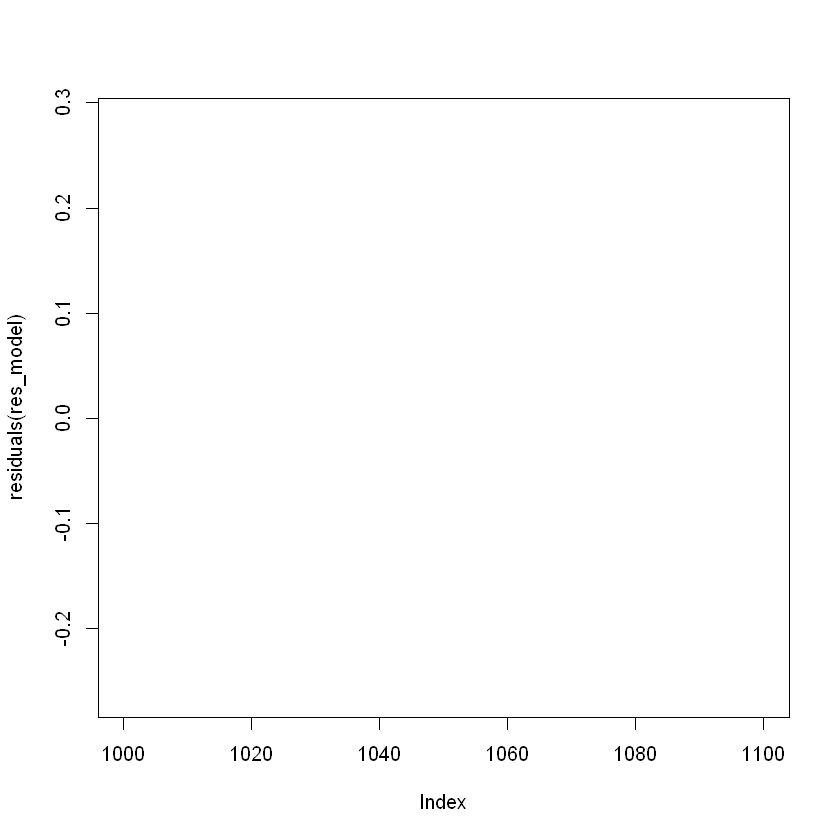

In [142]:
#scatterplot(data = res_data, y = residuals, x = id, best_fit_line = TRUE) -broken for some reason
plot(residuals(res_model), type = "b", xlim = c(1000,1100))

##### Linearity

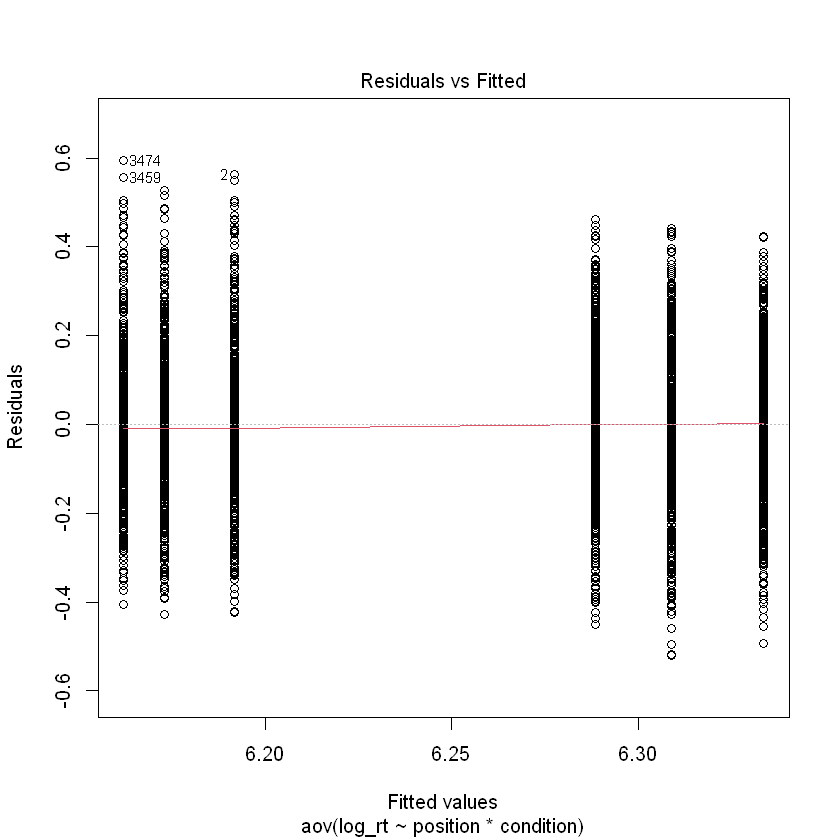

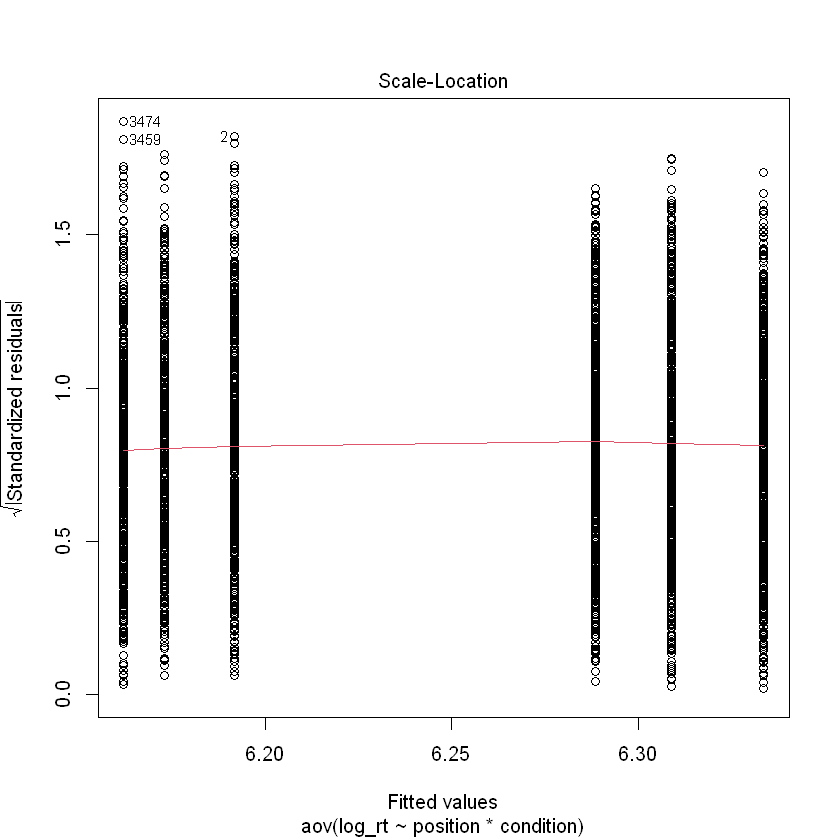

In [143]:

plot(test, which= 1)
plot(test, which= 3)

##### Equality of variance

Used to assess whether variance is equal between groups

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,2.826919,0.09295155
,1222,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.8383088,0.3599405
,3705,NA,NA


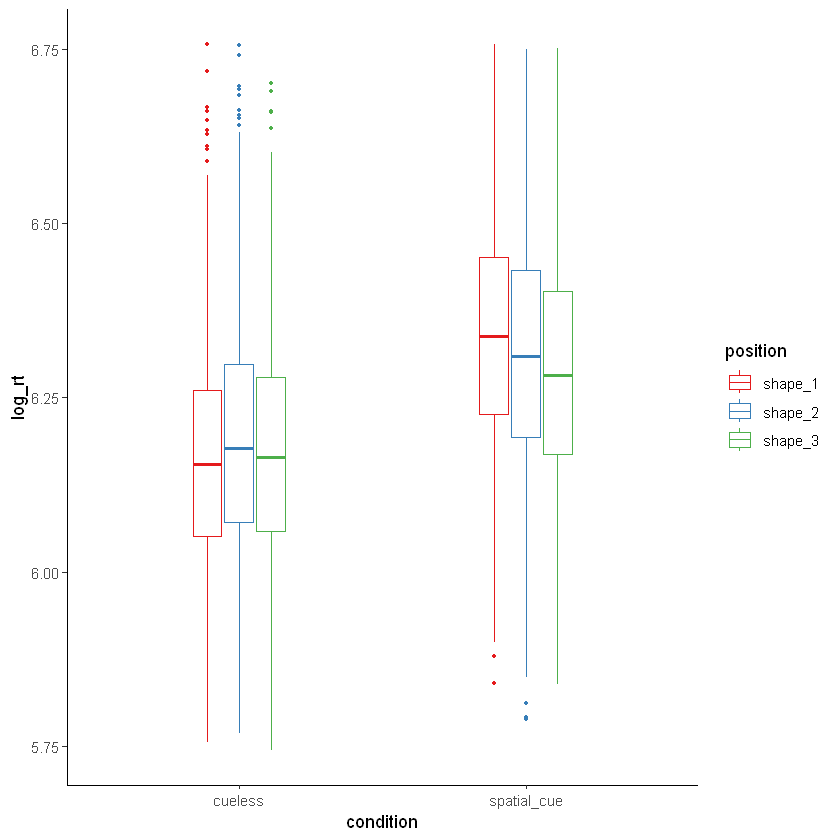

In [144]:
library(car)


leveneTest(OML ~ condition, data = online_OML)
leveneTest(log_rt ~ condition, data = online_position)

tukeyboxplot(data = online_position, x = condition, y = log_rt, by = position)


### OML data
#### Linear models 

[1] "Cueless linear model ------------------------------------------------------------------------"



Call:
lm(formula = OML ~ block, data = online_OML_cueless)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37218 -0.07799  0.00105  0.08000  0.55795 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.001827   0.010540  -0.173   0.8624  
block       -0.001396   0.000737  -1.895   0.0586 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1196 on 549 degrees of freedom
Multiple R-squared:  0.006498,	Adjusted R-squared:  0.004688 
F-statistic:  3.59 on 1 and 549 DF,  p-value: 0.05864


[1] "Spatial-cue linear model ------------------------------------------------------------------------"



Call:
lm(formula = OML ~ block, data = online_OML_spatial_cue)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.92431 -0.06987 -0.00294  0.07190  0.41809 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0421049  0.0093254   4.515 7.44e-06 ***
block       -0.0005045  0.0006526  -0.773     0.44    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1192 on 694 degrees of freedom
Multiple R-squared:  0.0008603,	Adjusted R-squared:  -0.0005794 
F-statistic: 0.5975 on 1 and 694 DF,  p-value: 0.4398


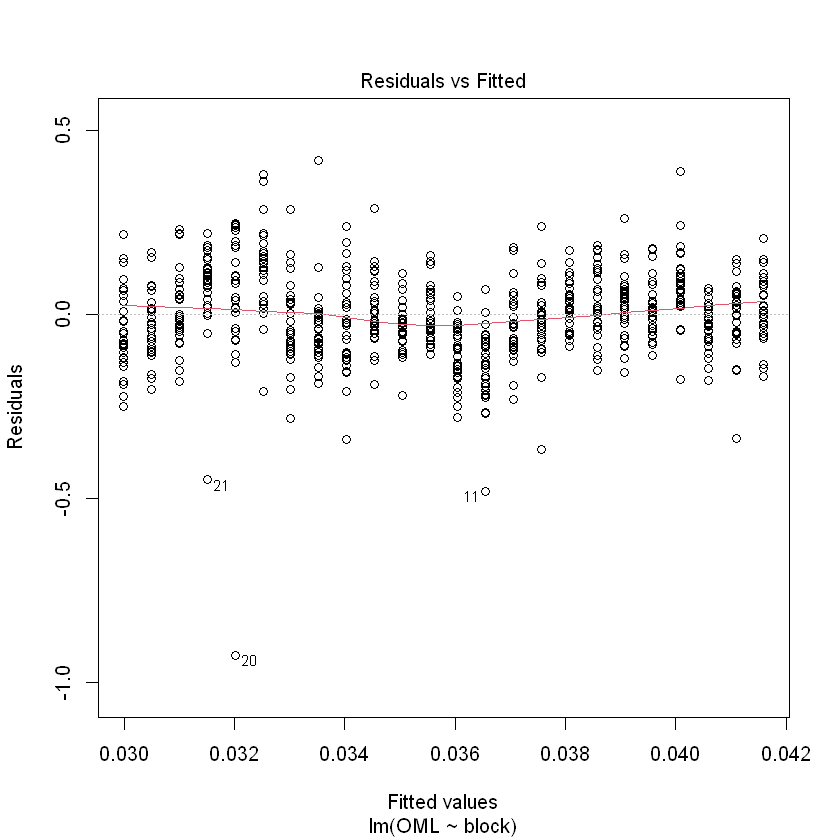

In [145]:
#cueless lm 
print("Cueless linear model ------------------------------------------------------------------------")
cueless_lm = lm(OML ~ block, data = online_OML_cueless)
summary(cueless_lm)

#spatial cue lm
print("Spatial-cue linear model ------------------------------------------------------------------------")
spatial_cue_lm = lm(OML ~ block, data = online_OML_spatial_cue)
summary(spatial_cue_lm)

plot(spatial_cue_lm,  which = 1)



# Offline data



In [146]:
#data setup 

offline_full<- remove_outlier(offline_full, c("correct"))

offline_illusionary<- remove_outlier(offline_illusionary, c("correct"))
offline_part <- remove_outlier(offline_part, c("correct"))



In [147]:


# library(arsenal)

# summary(comparedf(offline_illusionary, offline_illusionary_test))



## Descriptive statistics & visualisaiton

In [148]:
#get descriptive statistics for both conditions 
describe(data = offline_illusionary, by = condition, mean_ill = mean(correct), sd_ill = sd(correct))
describe(data = offline_part, by = condition, mean_part = mean(correct), sd_part = sd(correct))

condition,mean_ill,sd_ill
<fct>,<dbl>,<dbl>
cueless,0.4782609,0.1689566
spatial_cue,0.4206349,0.2868364


condition,mean_part,sd_part
<fct>,<dbl>,<dbl>
cueless,0.5681818,0.1250301
spatial_cue,0.5714286,0.1376532


`summarise()` has grouped output by 'condition'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'condition'. You can override using the `.groups` argument.
Saving 6.67 x 6.67 in image
Don't know how to automatically pick scale for object of type
<grouped_df/tbl_df/tbl/data.frame>. Defaulting to continuous.
ERROR while rich displaying an object: Error in `geom_boxplot()`:
! Problem while computing aesthetics.
i Error occurred in the 1st layer.
Caused by error in `check_aesthetics()`:
! Aesthetics must be either length 1 or the same as the data (88)
x Fix the following mappings: `y`

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. t

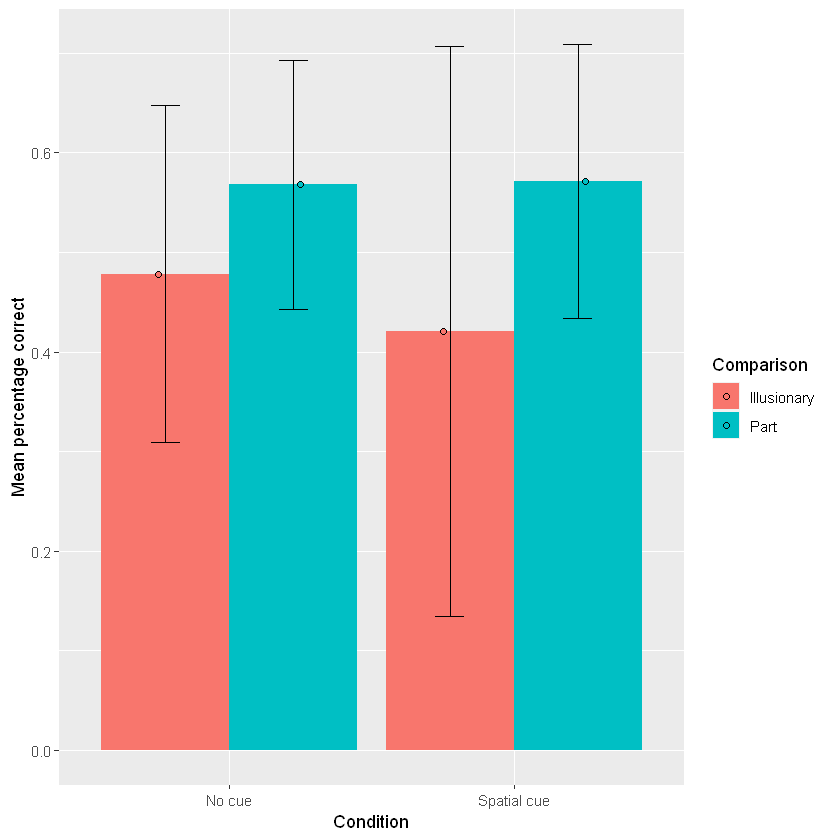

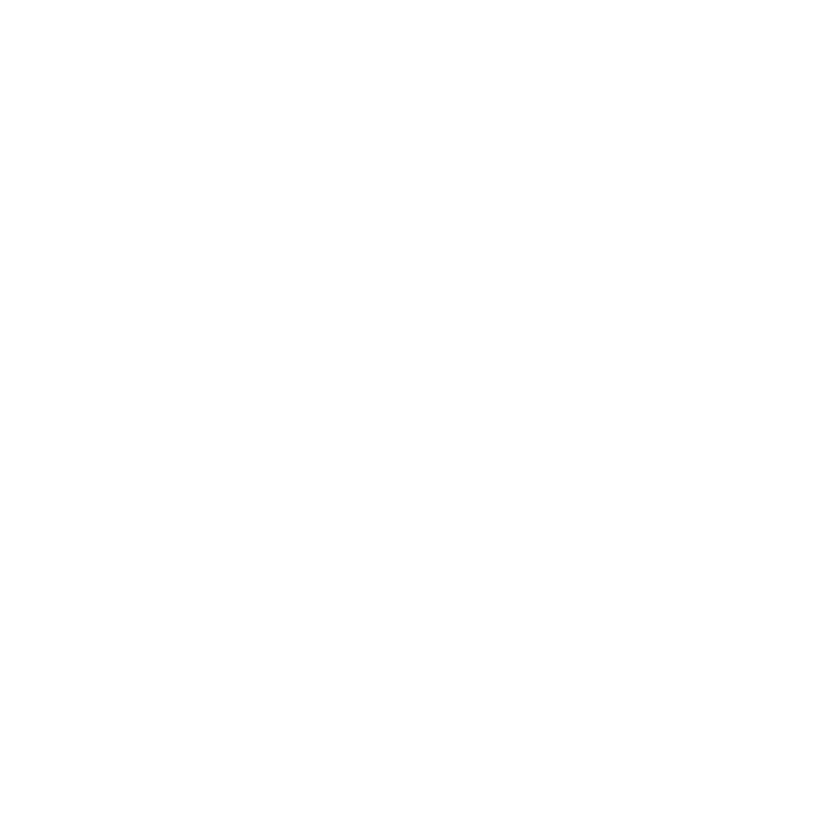

In [149]:
#create dataframe for graphs 
df1 <- offline_illusionary %>% group_by(condition, comparison_type) %>% summarize(Comparison = "Illusionary",
mean = mean(correct), sd = sd(correct))

df2 <- offline_part %>% group_by(condition,comparison_type) %>% summarize(Comparison = "Part",
mean = mean(correct), sd = sd(correct))

df <- rbind(df1, df2)

#create graph 
plot = ggplot(df, aes(x=condition,y = mean, fill = Comparison, group = Comparison, , ymin = mean-sd, ymax = mean+sd)) +
geom_bar(stat="identity", position = "dodge") +  
labs(x = "Condition", y = "Mean percentage correct", add = c("mean_se", "jitter")) +
geom_point(aes(x = condition), shape = 21, position = position_dodge(width = 1))

plot + geom_errorbar(width = 0.2, position= position_dodge(0.9), aes(group = Comparison))+ scale_x_discrete(
  labels=c("cueless" = "No cue", 'spatial_cue'= 'Spatial cue')
) 


ggsave(r"(C:\Users\invate\OneDrive\Documents\Nottingham Trent Work\Project lab\Analysis\Graphs\2_AFC.png)")


#create tukey boxplot 
tukeyboxplot(data = offline_full, x = condition, y = df, by = comparison_type)


`summarise()` has grouped output by 'condition'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'condition'. You can override using the `.groups` argument.
Warning message in geom_bar(position = "dodge", stat = "summary", y.fun = "mean"):
"Ignoring unknown parameters: `y.fun`"
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`


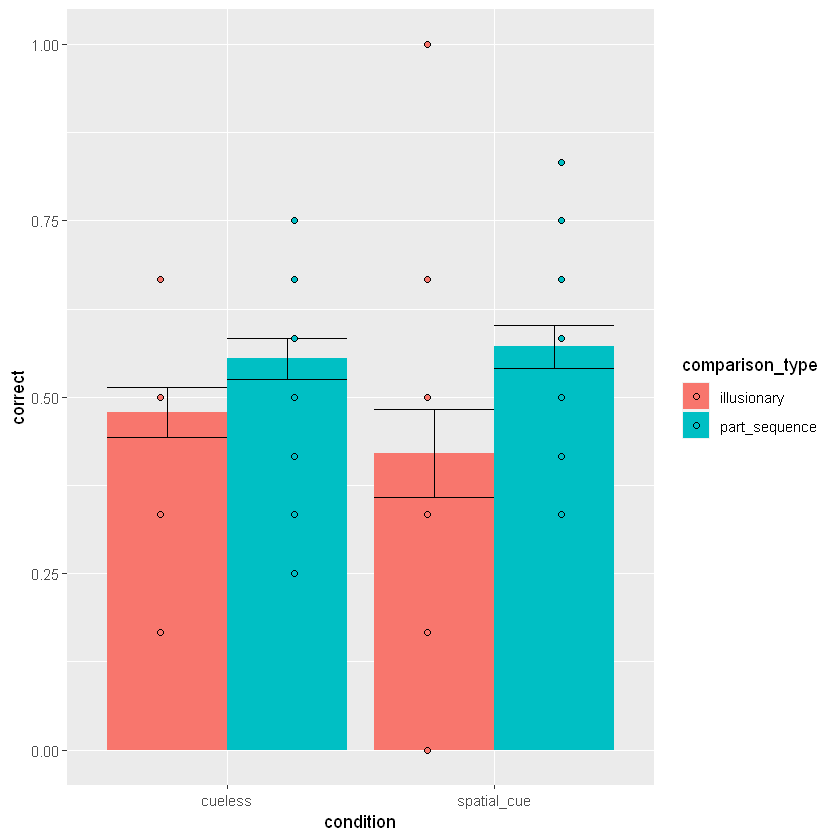

In [150]:
df1 <- offline_illusionary %>% group_by(condition, comparison_type) %>% summarize(Comparison = "Illusionary",
correct = mean(correct), sd = sd(correct))

df2 <- offline_part %>% group_by(condition,comparison_type) %>% summarize(Comparison = "Part",
correct = mean(correct), sd = sd(correct))

df <- rbind(df1, df2)

plot <- ggplot(offline_full, aes(condition, correct, fill = comparison_type))+
geom_bar(position = "dodge", stat = "summary", y.fun = "mean") +
geom_errorbar(stat = 'summary', position = 'dodge', width = 0.9) +
geom_point(aes(x = condition), shape = 21, position = position_dodge(width = 1))

print(plot)


## Analyses
### Assumption checks 


In [151]:
#Get residuals

res_model <- aov(log(correct +0.1)  ~ comparison_type*condition, data = offline_full)


res_data <- mutate(offline_full, residuals = residuals(res_model))

#### Normality

comparison_type,statistic,p_value
<fct>,<dbl>,<dbl>
illusionary,0.7819904,1.211014e-06
part_sequence,0.9258423,7.502520e-03


comparison_type,statistic,p_value
<fct>,<dbl>,<dbl>
illusionary,0.9057744,0.001645536
part_sequence,0.9540361,0.077825950


[1] "Skew and kurtosis:"


condition,skew,kurt
<fct>,<dbl>,<dbl>
cueless,-0.8369595,3.141367
spatial_cue,-1.1671340,4.143383


comparison_type,skew,kurt
<fct>,<dbl>,<dbl>
illusionary,-1.0814691,3.648294
part_sequence,-0.7214963,2.960274


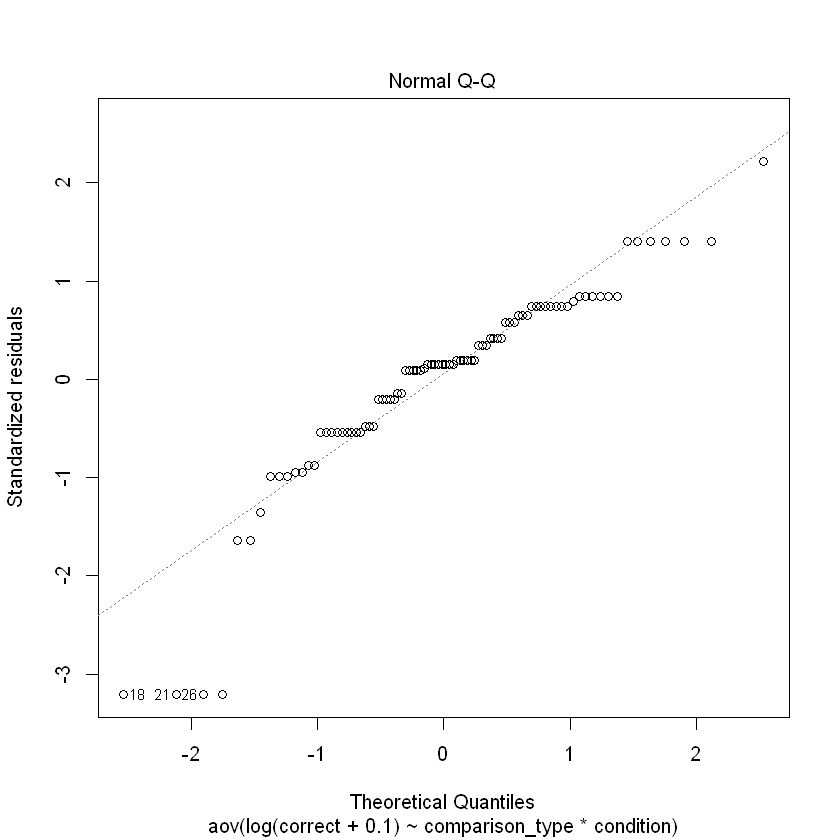

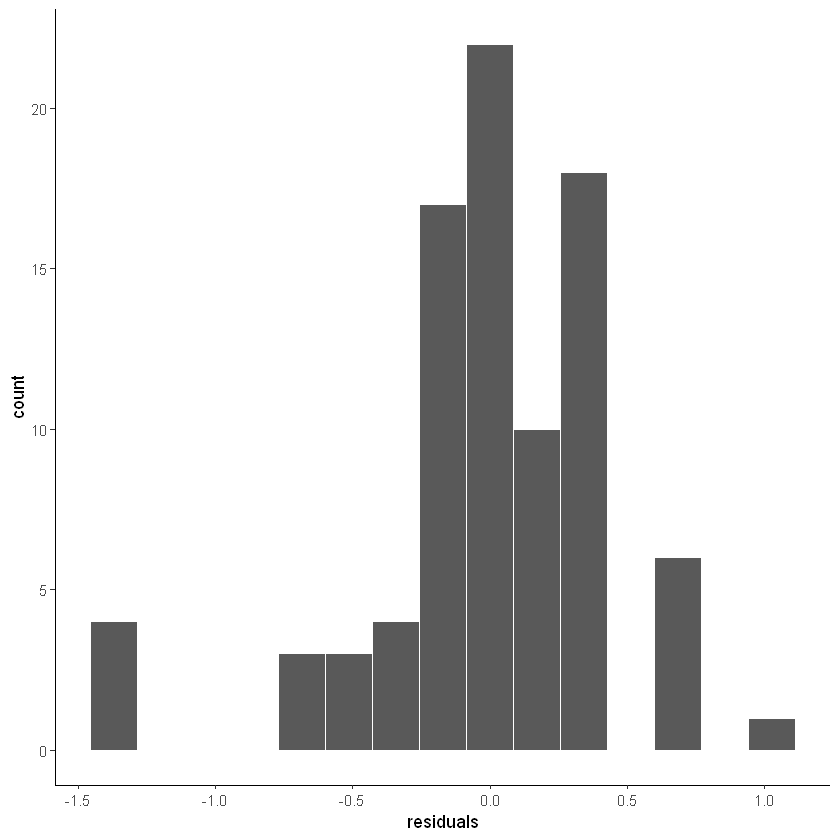

In [152]:
#normality
shapiro_test(y = log(correct + 0.1), by = comparison_type, data = res_data) #
shapiro_test(y = correct, by = comparison_type, data = offline_full) 
#access skew & kurtosis 
print("Skew and kurtosis:")
describe(res_data, by = condition, skew = moments::skewness(residuals), kurt = moments::kurtosis((residuals)) )
describe(res_data, by = comparison_type, skew = moments::skewness(residuals), kurt = moments::kurtosis((residuals)) )

plot(res_model, which = 2)

histogram(data = res_data, x = residuals, bins = 15)

#### Independence

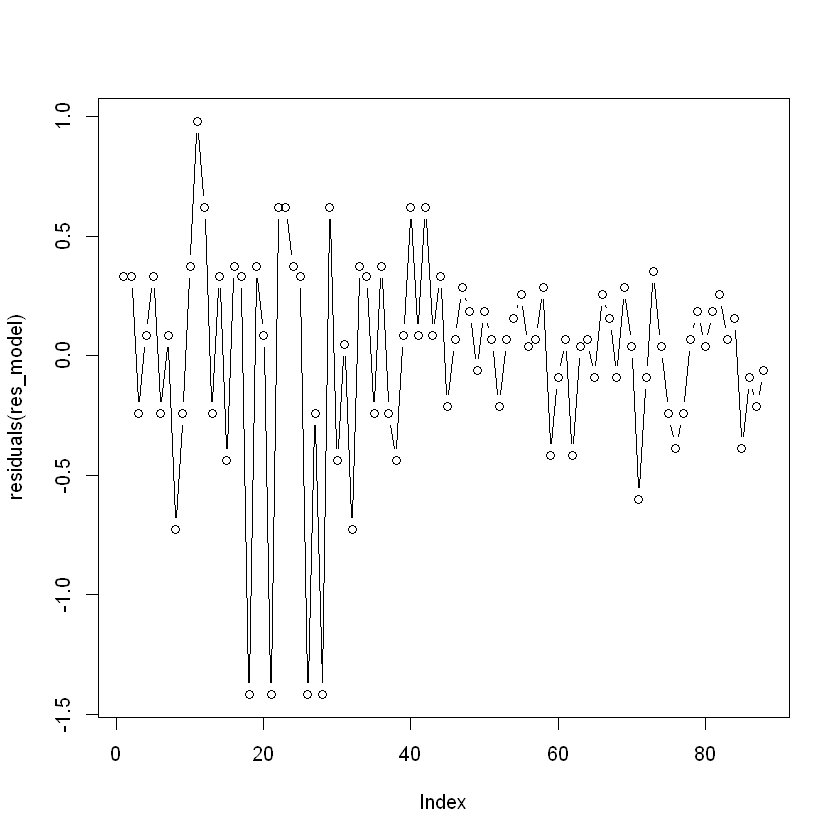

In [153]:
#scatterplot(data = res_data, y = residuals, x = id, best_fit_line = TRUE)
plot(residuals(res_model), type = "b")

### Linearity & homogeneity

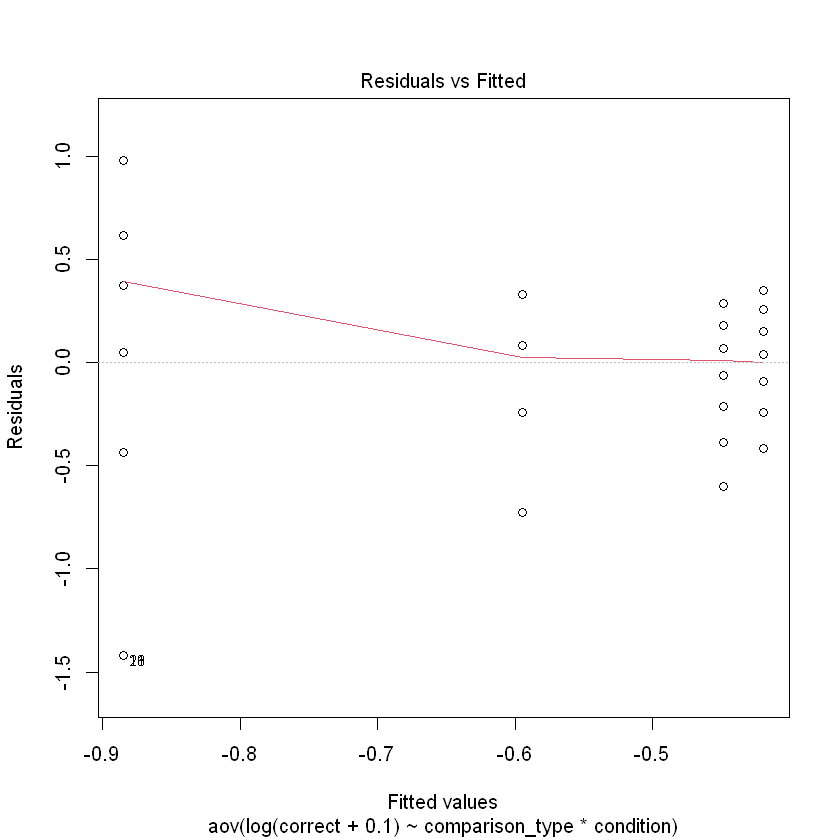

Levene's Test for Homogeneity of Variance (center = median)
      Df F value Pr(>F)
group  1  2.0078 0.1601
      86               


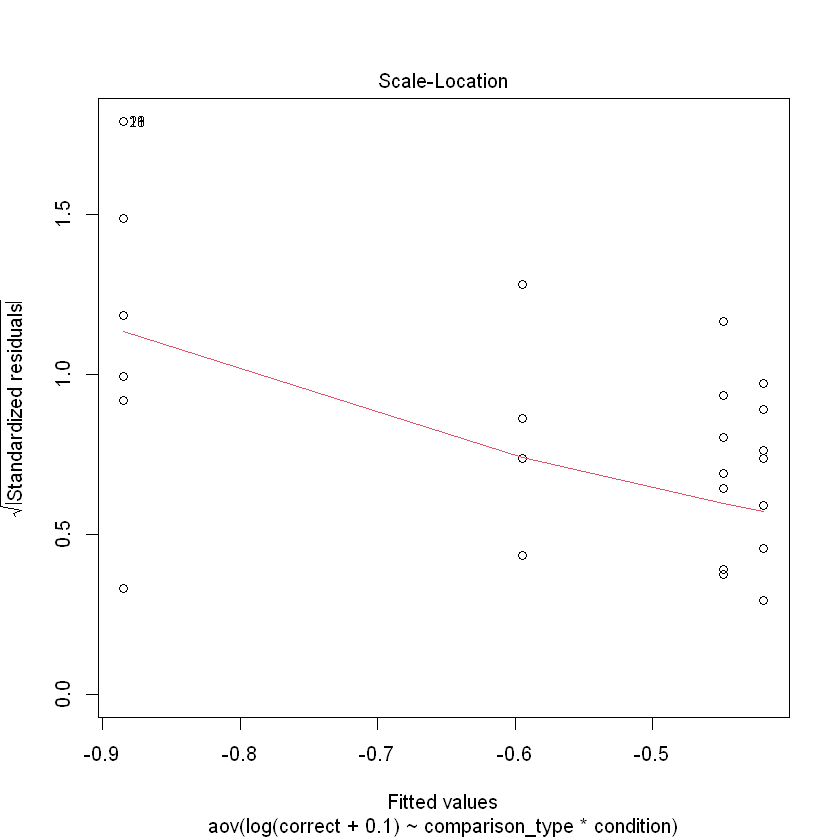

In [154]:
plot(res_model, which = 1)
plot(res_model, which = 3)

lt = leveneTest(correct~condition, data = offline_full)
print(lt)

### One-sample t-tests

In [155]:

#part-sequence 
cueless_part = offline_part %>% filter(grepl("cueless", condition))
spatial_part = offline_part %>% filter(grepl("spatial_cue", condition))
part_os_cl = t.test(cueless_part$correct, mu = 0.5, alternative = "greater")
print(part_os_cl)
part_os_sc = t.test(spatial_part$correct, mu = 0.5, alternative = "greater")
print(part_os_sc)

#illusionary triplet 
cueless_illusion = offline_illusionary %>% filter(grepl("cueless",condition))
spatial_illusion = offline_illusionary %>% filter(grepl("spatial_cue",condition))

ill_os_cl = t.test(cueless_illusion$correct, mu = 0.5, alternative = "less")
print(ill_os_cl)
ill_os_sc = t.test(spatial_illusion$correct, mu = 0.5, alternative = "less")
print(ill_os_sc)


	One Sample t-test

data:  cueless_part$correct
t = 2.5578, df = 21, p-value = 0.009165
alternative hypothesis: true mean is greater than 0.5
95 percent confidence interval:
 0.5223128       Inf
sample estimates:
mean of x 
0.5681818 


	One Sample t-test

data:  spatial_part$correct
t = 2.3779, df = 20, p-value = 0.01375
alternative hypothesis: true mean is greater than 0.5
95 percent confidence interval:
 0.5196208       Inf
sample estimates:
mean of x 
0.5714286 


	One Sample t-test

data:  cueless_illusion$correct
t = -0.61707, df = 22, p-value = 0.2718
alternative hypothesis: true mean is less than 0.5
95 percent confidence interval:
      -Inf 0.5387557
sample estimates:
mean of x 
0.4782609 


	One Sample t-test

data:  spatial_illusion$correct
t = -1.268, df = 20, p-value = 0.1097
alternative hypothesis: true mean is less than 0.5
95 percent confidence interval:
      -Inf 0.5285899
sample estimates:
mean of x 
0.4206349 



##### Wilcox tests

In [156]:
#part-sequence 
cueless_part = offline_part %>% filter(grepl("cueless", condition))
spatial_part = offline_part %>% filter(grepl("spatial_cue", condition))
part_os_cl = wilcox.test(cueless_part$correct, mu = 0.5, alternative = "greater")
print(part_os_cl)
part_os_sc = wilcox.test(spatial_part$correct, mu = 0.5, alternative = "greater")
print(part_os_sc)

#illusionary triplet 
cueless_illusion = offline_illusionary %>% filter(grepl("cueless",condition))
spatial_illusion = offline_illusionary %>% filter(grepl("spatial_cue",condition))
ill_os_cl = wilcox.test(cueless_illusion$correct, mu = 0.5, alternative = "greater")
print(ill_os_cl)
ill_os_sc = wilcox.test(spatial_illusion$correct, mu = 0.5, alternative = "greater")
print(ill_os_sc)

Warning message in wilcox.test.default(cueless_part$correct, mu = 0.5, alternative = "greater"):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(cueless_part$correct, mu = 0.5, alternative = "greater"):
"cannot compute exact p-value with zeroes"



	Wilcoxon signed rank test with continuity correction

data:  cueless_part$correct
V = 171, p-value = 0.006802
alternative hypothesis: true location is greater than 0.5



Warning message in wilcox.test.default(spatial_part$correct, mu = 0.5, alternative = "greater"):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(spatial_part$correct, mu = 0.5, alternative = "greater"):
"cannot compute exact p-value with zeroes"



	Wilcoxon signed rank test with continuity correction

data:  spatial_part$correct
V = 110, p-value = 0.01551
alternative hypothesis: true location is greater than 0.5



Warning message in wilcox.test.default(cueless_illusion$correct, mu = 0.5, alternative = "greater"):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(cueless_illusion$correct, mu = 0.5, alternative = "greater"):
"cannot compute exact p-value with zeroes"



	Wilcoxon signed rank test with continuity correction

data:  cueless_illusion$correct
V = 36, p-value = 0.9762
alternative hypothesis: true location is greater than 0.5



Warning message in wilcox.test.default(spatial_illusion$correct, mu = 0.5, alternative = "greater"):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(spatial_illusion$correct, mu = 0.5, alternative = "greater"):
"cannot compute exact p-value with zeroes"



	Wilcoxon signed rank test with continuity correction

data:  spatial_illusion$correct
V = 34, p-value = 0.9362
alternative hypothesis: true location is greater than 0.5



### ANOVA

In [157]:
ez_anova(data = offline_full, dv = correct, wid = id, within = comparison_type, between = condition, type = 3, detailed = TRUE, return_aov = TRUE)


Warning message:
"Data is unbalanced (unequal N per group). Make sure you specified a well-considered value for the type argument to ezANOVA()."


$ANOVA
                     Effect DFn DFd          SSn      SSd           F
1               (Intercept)   1  42 22.499553147 2.060027 458.7227344
2                 condition   1  42  0.009022844 2.060027   0.1839585
3           comparison_type   1  42  0.282526514 1.017584  11.6610658
4 condition:comparison_type   1  42  0.030632574 1.017584   1.2643361
             p p<.05         ges
1 3.180873e-24     * 0.879673486
2 6.701852e-01       0.002923199
3 1.426292e-03     * 0.084081831
4 2.672174e-01       0.009855268

$aov

Call:
aov(formula = formula(aov_formula), data = data)

Grand Mean: 0.5066288

Stratum 1: id

Terms:
                condition Residuals
Sum of Squares  0.0090228 2.0600270
Deg. of Freedom         1        42

Residual standard error: 0.2214684
1 out of 2 effects not estimable
Estimated effects are balanced

Stratum 2: id:comparison_type

Terms:
                comparison_type condition:comparison_type Residuals
Sum of Squares        0.2747001                 0.03063

#### Post-hoc tests(if relevant)

In [158]:
model = aov(correct ~ comparison_type*condition+Error(id/comparison_type), data = offline_full)
model_ph <- emmeans(model, specs = pairwise ~ comparison_type | condition , adjust = "bonf") #must assign to variable to get it to work with Juepyter 
print(model_ph)

Note: re-fitting model with sum-to-zero contrasts



$emmeans
condition = cueless:
 comparison_type emmean     SE   df lower.CL upper.CL
 illusionary      0.479 0.0405 74.4    0.398    0.559
 part_sequence    0.555 0.0405 74.4    0.474    0.636

condition = spatial_cue:
 comparison_type emmean     SE   df lower.CL upper.CL
 illusionary      0.421 0.0411 76.3    0.339    0.503
 part_sequence    0.572 0.0411 76.3    0.490    0.654

Confidence level used: 0.95 

$contrasts
condition = cueless:
 contrast                    estimate     SE df t.ratio p.value
 illusionary - part_sequence  -0.0761 0.0459 42  -1.658  0.1048

condition = spatial_cue:
 contrast                    estimate     SE df t.ratio p.value
 illusionary - part_sequence  -0.1508 0.0480 42  -3.139  0.0031


